# Exercises in neural network and deep learning II

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [111]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [112]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Indlæs Adult-datasættet
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

data = pd.read_csv("adult.csv", header=None, names=column_names)


In [115]:
# Vælg relevante kolonner
data = data[['age', 'workclass', 'education', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']]

In [102]:
# Fjern mellemrum og punktummer fra income-kolonnen
data["income"] = data["income"].str.strip().replace({'.':''})

In [103]:
# fjerner alle tegn, der ikke er bogstaver, tal, <, > (så vi beholder <=50K og >50K).
data["income"] = data["income"].str.strip().str.replace(r"[^\w<>]", "", regex=True)

In [104]:
print(data["income"].unique())

['<50K' '>50K']


In [116]:
# Konverter 'workclass', 'education', og 'sex' til dummy-variabler
data = pd.get_dummies(data, columns=['workclass', 'education', 'sex'], drop_first=True)

In [117]:
# 4. Split data i træning/test

X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Konverter numeriske kolonner fra 'object' til 'float'
numeric_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train[numeric_cols] = X_train[numeric_cols].apply(pd.to_numeric, errors='coerce')
X_test[numeric_cols] = X_test[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [122]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [123]:
print(X_train.dtypes)


age                           float64
capital-gain                  float64
capital-loss                  float64
hours-per-week                float64
workclass_Federal-gov            bool
workclass_Local-gov              bool
workclass_Never-worked           bool
workclass_Private                bool
workclass_Self-emp-inc           bool
workclass_Self-emp-not-inc       bool
workclass_State-gov              bool
workclass_Without-pay            bool
workclass_workclass              bool
education_11th                   bool
education_12th                   bool
education_1st-4th                bool
education_5th-6th                bool
education_7th-8th                bool
education_9th                    bool
education_Assoc-acdm             bool
education_Assoc-voc              bool
education_Bachelors              bool
education_Doctorate              bool
education_HS-grad                bool
education_Masters                bool
education_Preschool              bool
education_Pr

In [ ]:
# skalering af data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
# 6. Konvertering til numpy arrays

X_train = X_train_scaled.astype('float32')
X_test = X_test_scaled.astype('float32')
y_train = y_train.to_numpy().astype('float32')
y_test = y_test.to_numpy().astype('float32')

### Byg modellen

In [126]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\Thoma\miniconda3\envs\pydata-book-tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
# 8. Kompilér modellen
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Træn modellen

In [128]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)



Epoch 1/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7829 - loss: 0.4912 - val_accuracy: 0.8380 - val_loss: 0.3691
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.3577 - val_accuracy: 0.8385 - val_loss: 0.3610
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.3539 - val_accuracy: 0.8413 - val_loss: 0.3564
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8475 - loss: 0.3470 - val_accuracy: 0.8443 - val_loss: 0.3543
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8488 - loss: 0.3449 - val_accuracy: 0.8434 - val_loss: 0.3530
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8545 - loss: 0.3340 - val_accuracy: 0.8447 - val_loss: 0.3510
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8568 - loss: 0.3318 - val_accuracy: 0.8456 - val_loss: 0.3502
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8511 - loss: 0.3404 - val_accuracy: 0.

In [ ]:
# 10. Visualisering af tab og nøjagtighed
history_dict = history.history


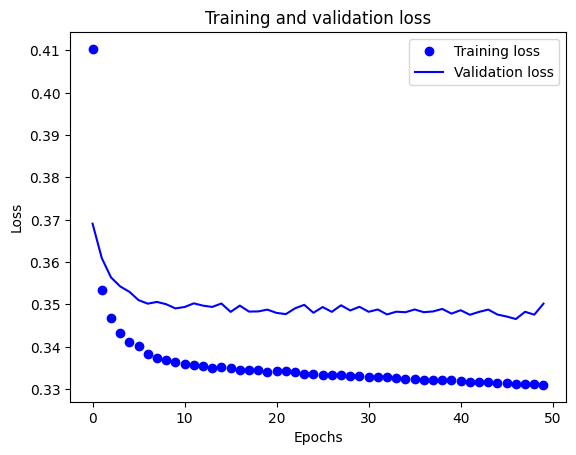

In [130]:
# Plot træning og valideringstab
plt.plot(history_dict['loss'], 'bo', label='Training loss')
plt.plot(history_dict['val_loss'], 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

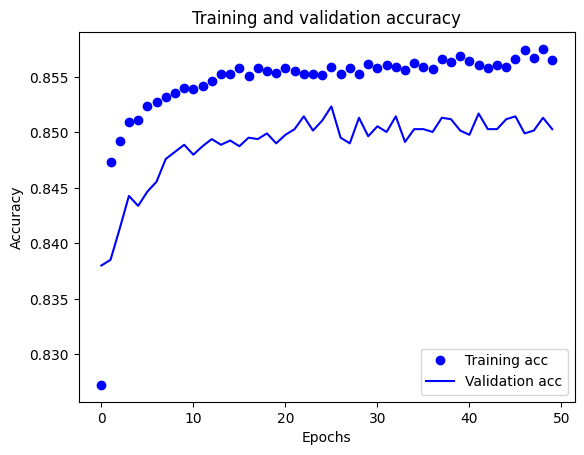

In [131]:
# Plot træning og valideringsnøjagtighed
plt.clf()
plt.plot(history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
# 11. Genopbygning af modellen med bedste epoch
best_epoch = np.argmin(history_dict['val_loss']) + 1  # Vælg den bedste epoch
print(f"Training the model with {best_epoch} epochs...")

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=best_epoch,
          batch_size=64,
          validation_split=0.2)

Training the model with 47 epochs...
Epoch 1/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8404 - loss: 0.4284 - val_accuracy: 0.8417 - val_loss: 0.3704
Epoch 2/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8494 - loss: 0.3470 - val_accuracy: 0.8431 - val_loss: 0.3600
Epoch 3/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.3428 - val_accuracy: 0.8458 - val_loss: 0.3561
Epoch 4/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8535 - loss: 0.3417 - val_accuracy: 0.8447 - val_loss: 0.3532
Epoch 5/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8535 - loss: 0.3417 - val_accuracy: 0.8473 - val_loss: 0.3512
Epoch 6/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8533 - loss: 0.3407 - val_accuracy: 0.8467 - val_loss: 0.3501
Epoch 7/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8500 - loss: 0.3438 - val_accuracy: 0.8476 - val_loss: 0.3502
Epoch 8/47
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8

In [134]:
# 12. Evaluering af modellen
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8510 - loss: 0.3499
Test Accuracy: 0.8520


In [135]:
# 13. Beregning af precision, recall og F1-score
y_pred = (model.predict(X_test) > 0.5).astype("int32")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
Precision: 0.6347
Recall: 0.2608
F1 Score: 0.3697


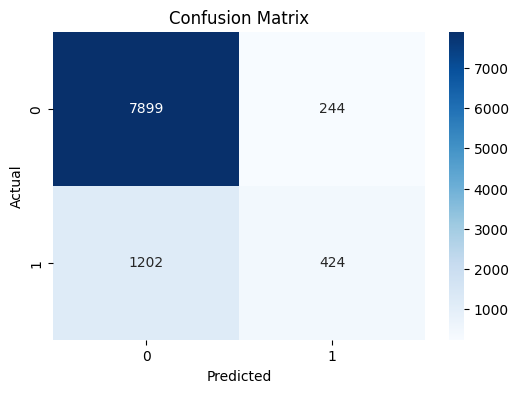

In [136]:
# 14. Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()